In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from skimage.color import rgb2gray
import pickle

In [2]:
(xTrain,yTrain),(xTest,yTest) = fashion_mnist.load_data()

In [3]:
xTrain.shape

(60000, 28, 28)

In [4]:
xTrain[0].shape

(28, 28)

In [5]:
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

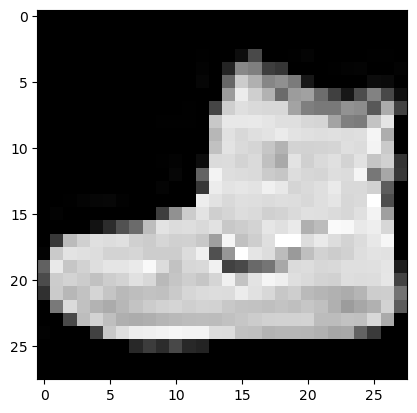

In [6]:
plt.imshow(xTrain[0],cmap = 'gray')

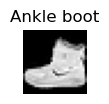

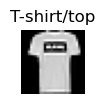

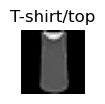

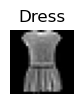

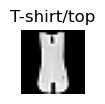

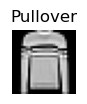

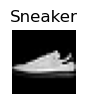

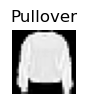

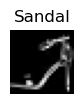

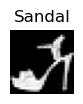

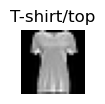

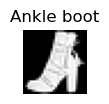

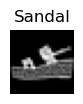

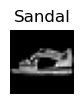

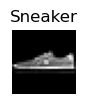

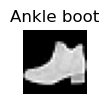

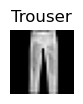

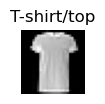

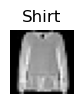

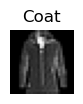

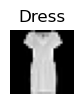

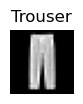

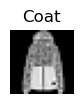

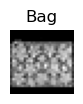

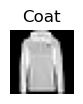

In [7]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(xTrain[i],cmap = 'gray')
    plt.title(label_names[yTrain[i]])
    plt.axis('off')
    plt.show()

In [8]:
normalized = xTrain/255

In [9]:
normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
normalized.shape

(60000, 28, 28)

In [11]:
normalized[0].shape

(28, 28)

In [12]:
normalized = normalized.reshape(60000,28,28,1)

In [13]:
normalized.shape

(60000, 28, 28, 1)

In [14]:
normalized[0].shape

(28, 28, 1)

In [15]:
xTest = xTest/255

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense,Flatten,MaxPooling2D

## Models

In [17]:
m = Sequential()

In [18]:
m.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))
m.add(MaxPooling2D(2,2))

In [19]:
m.add(Conv2D(64,(3,3),activation = 'relu'))
m.add(MaxPooling2D(2,2))

In [20]:
m.add(Flatten())

In [21]:
m.add(Dense(64,activation='relu'))
m.add(Dense(10,activation='softmax'))

m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [22]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [23]:
h1 = m.fit(normalized,yTrain,validation_data=(xTest,yTest),epochs=20)

Epoch 1/20
   1/1875 [..............................] - ETA: 4:49 - loss: 2.2933 - acc: 0.0938

2024-09-09 21:17:03.406293: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 13s 7ms/step - loss: 0.4659 - acc: 0.8303 - val_loss: 0.3593 - val_acc: 0.8700
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3125 - acc: 0.8866 - val_loss: 0.3111 - val_acc: 0.8855
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2692 - acc: 0.9017 - val_loss: 0.2793 - val_acc: 0.8980
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2384 - acc: 0.9128 - val_loss: 0.2844 - val_acc: 0.8946
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2161 - acc: 0.9192 - val_loss: 0.2466 - val_acc: 0.9098
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1949 - acc: 0.9274 - val_loss: 0.2485 - val_acc: 0.9096
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1776 - acc: 0.9347 - val_loss: 0.2484 - val_acc: 0.9125
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/st

In [24]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
15,0.077422,0.971050,0.383846,0.9031,15
16,0.073156,0.971950,0.358545,0.9063,16
17,0.065088,0.975467,0.389270,0.9090,17
18,0.060697,0.977550,0.403672,0.9030,18
19,0.057578,0.978200,0.395955,0.9062,19


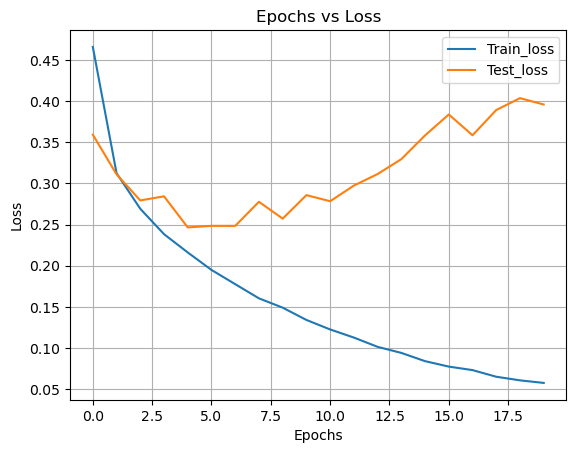

In [25]:
plt.plot(r1['Epochs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test_loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

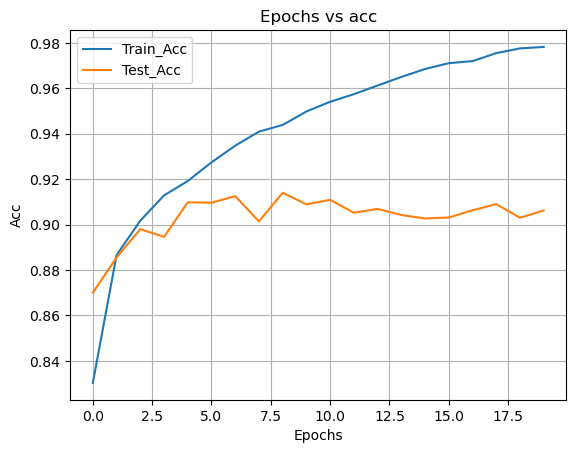

In [26]:
plt.plot(r1['Epochs'],r1['acc'],label='Train_Acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test_Acc')
plt.title('Epochs vs acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid()
plt.show()

In [27]:
ypred = m.predict(xTest)

313/313 [==============================] - 1s 3ms/step


In [28]:
ypred

array([[6.4076441e-17, 3.9902779e-13, 7.2217066e-11, ..., 3.9146546e-08,
        5.8771543e-11, 9.9999833e-01],
       [1.4163714e-16, 3.8935975e-29, 1.0000000e+00, ..., 8.8774324e-25,
        4.3442649e-23, 8.1825060e-28],
       [4.4352031e-17, 1.0000000e+00, 1.9508800e-17, ..., 2.5466683e-26,
        1.8042075e-24, 3.0667519e-26],
       ...,
       [2.7907774e-25, 2.5501751e-28, 1.1304676e-22, ..., 5.5334408e-26,
        1.0000000e+00, 1.1786320e-26],
       [5.4685850e-16, 1.0000000e+00, 2.7999115e-13, ..., 1.6111342e-26,
        1.8764202e-19, 7.1978295e-19],
       [5.5169227e-07, 1.2477704e-15, 5.3446348e-11, ..., 1.7565053e-07,
        2.0171836e-07, 1.0291238e-09]], dtype=float32)

In [42]:
from sklearn import metrics

In [44]:
y_pred = np.argmax(ypred, axis=1)

In [45]:
cf = metrics.confusion_matrix(yTest,y_pred)

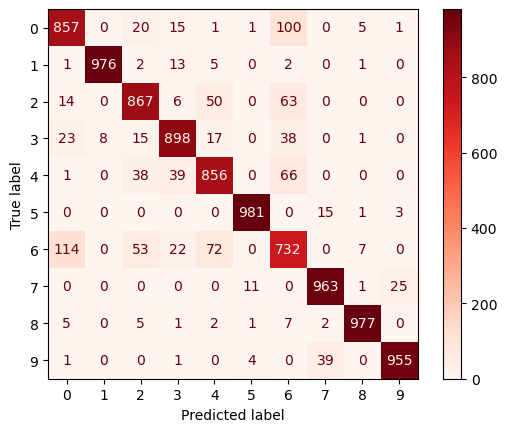

In [54]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=np.arange(10))  # Adjust labels as needed

# Plot confusion matrix
cm_display.plot(cmap=plt.cm.Reds)  # Choose a colormap
plt.show()